In [17]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import cfrs

In [19]:
import numpy as np

np.finfo(float).eps

2.220446049250313e-16

In [117]:
import itertools
import scipy.stats as stats

from matplotlib.patches import Rectangle
from tempfile import NamedTemporaryFile
from matplotlib.lines import Line2D
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns


def get_size(fig, dpi=100):
    with NamedTemporaryFile(suffix='.png') as f:
        fig.savefig(f.name, bbox_inches='tight', dpi=dpi)
        height, width, _channels = imread(f.name).shape
        return width / dpi, height / dpi


def set_size(fig, size, dpi=100, eps=1e-2, give_up=2, min_size_px=10):
    target_width, target_height = size
    set_width, set_height = target_width, target_height  # reasonable starting point
    deltas = []  # how far we have
    while True:
        fig.set_size_inches([set_width, set_height])
        actual_width, actual_height = get_size(fig, dpi=dpi)
        set_width *= target_width / actual_width
        set_height *= target_height / actual_height
        deltas.append(abs(actual_width - target_width) + abs(actual_height - target_height))
        if deltas[-1] < eps:
            return True
        if len(deltas) > give_up and sorted(deltas[-give_up:]) == deltas[-give_up:]:
            return False
        if set_width * dpi < min_size_px or set_height * dpi < min_size_px:
            return False

def burn_in(M, S, z=20, selection_mode='utility'):
    rv = stats.poisson(z)
    tosses = enumerate(rv.rvs(M.n_users))
    iterator_ = np.array(list(itertools.chain.from_iterable(
        itertools.repeat(user_index, repeats) for user_index, repeats in enumerate(rv.rvs(M.n_users))
    )))
    np.random.shuffle(iterator_)
    

    for user_index in iterator_:
        M.interact(user_index, S, selection_mode=selection_mode)


In [ ]:
S = cfrs.CollaborativeFiltering(n_users=1000, n_items=2100, k=50, r=10)
M = cfrs.Users(n_users=1000, n_items=2100, 
          list_alphas=[.3, 1.3, 2, 3, 5],
          list_betas=[5, 3, 2, 1.3, .3], 
          list_sizes=[200, 500, 700, 500, 200])
burn_in(M, S, z=50)

1.0000000000007052
1.0000000000013718
1.000000000000881
1.0000000000013716
1.0000000000007048


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

fig, axs = plt.subplots(1,2, figsize=(9,2.5), gridspec_kw={"wspace": 0.1}, sharex=True)

sns.heatmap(M.X, norm=LogNorm(), ax=axs[0])
axs[0].set_ylabel("Users ($U$)", fontsize=12)
axs[0].set_xlabel("Items ($C$)", fontsize=12)

sns.heatmap(S.X, ax=axs[1])
axs[1].set_ylabel("Users ($U$)", fontsize=12)

axs[1].set_xlabel("Items ($C$)", fontsize=12)
axs[1].set_xticks([0, 200, 700, 1400, 1900, 2100])
axs[1].set_xticklabels([0, 200, 700, 1400, 1900, 2100], rotation=0, fontsize=12)
set_size(fig, (14,3))


In [419]:
from collections import Counter
import pandas as pd

def map_index_to_topic(val,
    list_size=[20, 50, 70, 50, 20], 
    list_names=["L", "CL", "C", "CR", "R"]):
    cumsum = np.array(list_size).cumsum()
    return list_names[(val < cumsum).argmax()]
 

def measure_1_round(M, S, to_add, z=50, user_index=1000, selection_mode='random'):
    rv = stats.poisson(z)
    tosses = 20#rv.rvs()
    tmp = np.copy(S.X[user_index, :])
    S.X[user_index, :] = np.random.random(S.X.shape[1]) / 10**10
    for ta in to_add:
        S.X[user_index, ta] = 1
    dict_vals = []

    for i in range(tosses):

        recommendations, choice = M.interact(user_index, S, selection_mode=selection_mode)
        for label in [map_index_to_topic(rec) for rec in recommendations]:
            print(label)
            dict_vals.append({
                "idx": i,
                "user_index": user_index,
                "label": label,
                "kind": "recommendation"
            })
        
        dict_vals.append({
            "idx": i,
            "user_index": user_index,
            "label": map_index_to_topic(choice),
            "kind": "choice"
        })

    
    S.X[user_index, :] = tmp
    
    
    return pd.DataFrame(dict_vals).fillna(0)
dfs = []
for i in range(100):
    to_add = [1000]
    print(to_add)
    df = measure_1_round(M, S, to_add, 20, 1)
    df["idy"] = i
    dfs.append(df)
dfs = pd.concat(dfs)
#     print(measure_1_round(M, S, to_add, 30, 30).groupby("choice").idx.sum())


[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L

L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L


L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L

L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L


L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
[1000]
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L


In [415]:
x = dfs[dfs.kind == "recommendation"].groupby(["idx", "label"]).count().idy.reset_index()
x_norm = dfs[dfs.kind == "recommendation"].groupby(["idx"]).count().idy.reset_index()

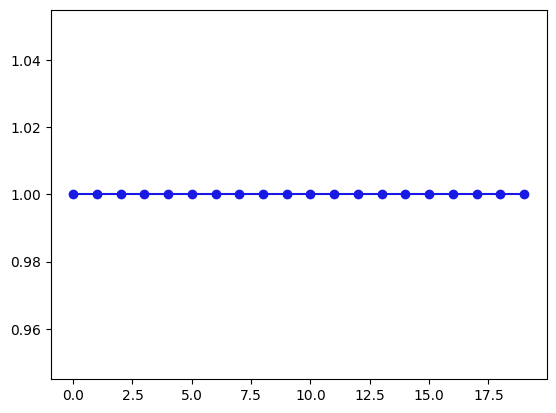

In [416]:
plt.plot(x[x.label == "L"].set_index("idx")/x_norm.set_index("idx"), marker="o", color="#1919e6")
plt.plot(x[x.label == "CL"].set_index("idx")/x_norm.set_index("idx"), marker="o", color="#4d4db3")
plt.plot(x[x.label == "C"].set_index("idx")/x_norm.set_index("idx"), marker="o", color="#808080")
